<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_Random_Forest(Fraud_Check).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Random Forest to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [19]:
fr=pd.read_csv("Fraud_check.csv")
fr

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [20]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [21]:
fr.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [23]:
label_encoder = preprocessing.LabelEncoder()
fr['Undergrad']=label_encoder.fit_transform(fr['Undergrad'])
fr['Marital.Status']=label_encoder.fit_transform(fr['Marital.Status'])
fr['Urban']=label_encoder.fit_transform(fr['Urban'])
fr

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


<Axes: xlabel='Taxable.Income', ylabel='Density'>

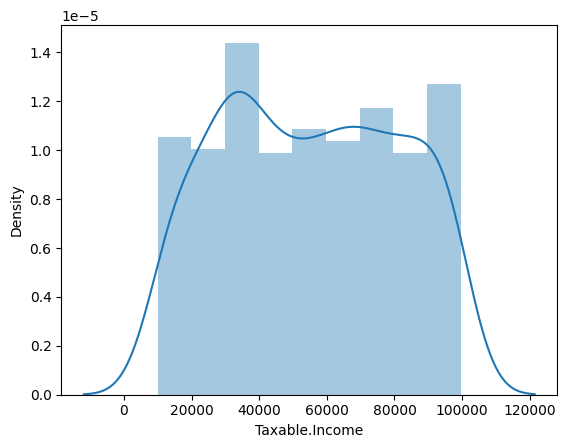

In [24]:
sns.distplot(fr['Taxable.Income'])

<Axes: ylabel='Work.Experience'>

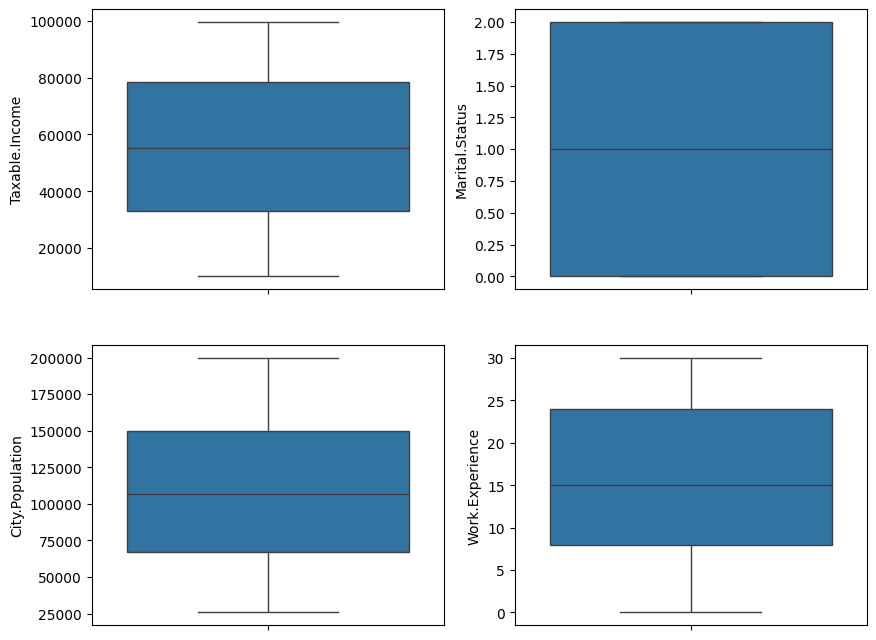

In [41]:
fig, ax = plt.subplots(2,2, figsize=(10,8))
sns.boxplot(fr['Taxable.Income'], ax=ax[0,0])
sns.boxplot(fr['Marital.Status'], ax=ax[0,1])
sns.boxplot(fr['City.Population'], ax=ax[1,0])
sns.boxplot(fr['Work.Experience'], ax=ax[1,1])

In [42]:
fr["Taxableincome"]=(fr["Taxable.Income"]>30000)*1
fr

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxableincome
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [43]:
fr.drop(["Taxable.Income"],axis=1,inplace=True)
fr

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxableincome
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [44]:
X = fr.iloc[:,0:5]
Y = fr.iloc[:,5]

In [45]:
kfold = KFold(n_splits=20, random_state=42, shuffle = True)
cart = DecisionTreeClassifier()

In [46]:
#Model is able to generate an acccuracy of 74.16%
cart = DecisionTreeClassifier()
num_trees = 500
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7416666666666666
